基于数据集数据，根据提供的结构建立CNN模型，识别图片中的猫狗，计算预测的准确率。


In [3]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    "cats_and_dogs_filtered/train",
    image_size=(50, 50),
    batch_size=32,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "cats_and_dogs_filtered/validation",
    image_size=(50, 50),
    batch_size=32,
    shuffle=False
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


2025-11-14 14:27:01.952025: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
#load the data
#from keras.preprocessing.image import ImageDataGenerator
#train_datagen = ImageDataGenerator(rescale = 1./255)
#import keras
#print(keras.__version__)



from tensorflow.keras import layers

#归一化
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))




In [5]:
#建立模型
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
#卷积层 32filters 3X3 
model.add(Conv2D(32,(3, 3), input_shape=(50, 50, 3), activation='relu'))
#池化层 2X2
model.add(MaxPooling2D(pool_size=(2, 2)))
#卷积层 32filters 3X3 
model.add(Conv2D(32,(3, 3), activation='relu'))
#池化层 2X2
model.add(MaxPooling2D(pool_size=(2, 2)))
#flatten layer
model.add(Flatten())
#全连接层 
model.add(Dense(128, activation='relu'))
#dropout layer
model.add(Dense(1, activation='sigmoid'))




/usr/local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
#configure the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       495,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 506,017 (1.93 MB)

 Trainable params: 506,017 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#train the model
model.fit(train_ds, epochs=25)

Epoch 1/25
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1:22 1s/step - accuracy: 0.5625 - loss: 0.6859

2025-11-14 14:27:03.611190: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26763264 exceeds 10% of free system memory.
2025-11-14 14:27:03.611588: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26763264 exceeds 10% of free system memory.
2025-11-14 14:27:03.788169: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26763264 exceeds 10% of free system memory.
2025-11-14 14:27:03.788418: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26763264 exceeds 10% of free system memory.


 4/63 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.4863 - loss: 0.8861

2025-11-14 14:27:03.873617: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26763264 exceeds 10% of free system memory.


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5211 - loss: 0.7377
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5944 - loss: 0.6662
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6471 - loss: 0.6362
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6784 - loss: 0.5886
Epoch 5/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.7309 - loss: 0.5290
Epoch 6/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.7617 - loss: 0.4896
Epoch 7/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7862 - loss: 0.4560
Epoch 8/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8310 - loss: 0.3893
Epoch 9/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8418 - loss: 0.3552
Epoch 10/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8799 - loss: 0.2979
Epoch 11/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9082 - loss: 0.2447
Epoch 12/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9198 - l

In [9]:

accuracy_train = model.evaluate(train_ds)
print(accuracy_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0026
[0.0020360855851322412, 1.0]


In [10]:
#测试数据
accuracy_val = model.evaluate(val_ds)
print(accuracy_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6844 - loss: 1.7047
[1.617548942565918, 0.6980000138282776]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1]]


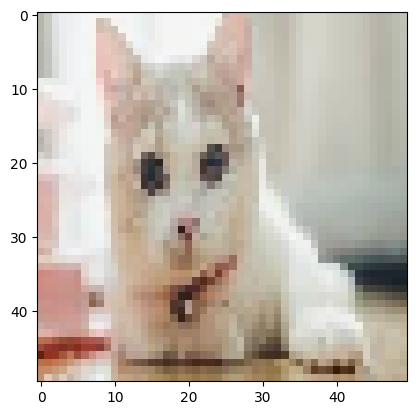

In [16]:
#load single image

from keras.utils import load_img, img_to_array
import numpy as np
#pic_name = 'dog.png'
pic_name = 'cat.png'
pic = load_img(pic_name, target_size=(50, 50))
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.imshow(pic)
pic_array = img_to_array(pic)
pic_array = pic_array / 255.0
pic_array = pic_array.reshape(1, 50, 50, 3)
result = model.predict(pic_array)
result = np.round(result).astype(int)
print(result)
#1 dog\ 0 cat